# Heart Disease Prediction Using Neural Networks in PyTorch

This project demonstrates how to build, train, and evaluate a neural network for heart disease prediction using clinical data. The workflow covers data preprocessing, model definition, training, and performance evaluation with metrics and confusion matrices. The approach provides a foundation for binary classification tasks in healthcare analytics using PyTorch.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("processed.switzerland.data", header=None, na_values="?")
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.0,0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
119,70,1,4,140.0,0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
120,72,1,3,160.0,0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
121,73,0,3,160.0,0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


In [5]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

In [7]:
df.columns = columns
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2


In [8]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
num           0
dtype: int64

In [9]:
df = df.drop(columns=["ca", "fbs"])

In [10]:
num_cols = ["trestbps", "restecg", "thalach", "exang", "oldpeak", "slope", "thal"]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [11]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df['target'].value_counts()

target
1    115
0      8
Name: count, dtype: int64

In [13]:
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,num,target
0,32,1,1,95.0,0,0.0,127.0,0.0,0.7,1.0,7.0,1,1
1,34,1,4,115.0,0,0.0,154.0,0.0,0.2,1.0,7.0,1,1
2,35,1,4,125.0,0,0.0,130.0,1.0,0.3,2.0,7.0,3,1
3,36,1,4,110.0,0,0.0,125.0,1.0,1.0,2.0,6.0,1,1
4,38,0,4,105.0,0,0.0,166.0,0.0,2.8,1.0,7.0,2,1


In [14]:
X = df.drop(columns=['target', "num"])
y = df['target']

In [15]:
X.shape, y.shape 

((123, 11), (123,))

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
import torch

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: torch.Size([98, 11])
Test size: torch.Size([25, 11])


In [26]:
import torch.nn as nn

# Define model
model = nn.Sequential(
    nn.Linear(11, 16),   # Input layer → Hidden layer (13 → 16)
    nn.ReLU(),           # Activation
    nn.Linear(16, 1),    # Hidden → Output layer (16 → 1)
    nn.Sigmoid()         # Output activation for binary classification
)

# Show architecture
print(model)

Sequential(
  (0): Linear(in_features=11, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): Sigmoid()
)


In [20]:
sum(p.numel() for p in model.parameters())

241

In [27]:
import torch.nn as nn

# Define your model here
custom_model = nn.Sequential(
    # TODO: Complete this structure
    nn.Linear(11, 32),
    nn.LeakyReLU(),
    nn.Linear(32,16),
    nn.Sigmoid(),
    nn.Linear(16,1),
    nn.Sigmoid()
    
)

# Print model architecture
print(custom_model)

Sequential(
  (0): Linear(in_features=11, out_features=32, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)


In [22]:
loss_fn = nn.BCELoss()

In [23]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [24]:
import torch.optim as optim

# Loss function: Binary Cross-Entropy
loss_fn = nn.BCELoss()

# Optimizer: Adam
optimizer = optim.Adam(model.parameters(), lr=0.01)

print("Loss function:", loss_fn)
print("Optimizer:", optimizer)

Loss function: BCELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [28]:
# Number of epochs
num_epochs = 200
train_losses = []

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss
    train_losses.append(loss.item())

    # Print every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/200], Loss: 0.5500
Epoch [20/200], Loss: 0.5500
Epoch [30/200], Loss: 0.5500
Epoch [40/200], Loss: 0.5500
Epoch [50/200], Loss: 0.5500
Epoch [60/200], Loss: 0.5500
Epoch [70/200], Loss: 0.5500
Epoch [80/200], Loss: 0.5500
Epoch [90/200], Loss: 0.5500
Epoch [100/200], Loss: 0.5500
Epoch [110/200], Loss: 0.5500
Epoch [120/200], Loss: 0.5500
Epoch [130/200], Loss: 0.5500
Epoch [140/200], Loss: 0.5500
Epoch [150/200], Loss: 0.5500
Epoch [160/200], Loss: 0.5500
Epoch [170/200], Loss: 0.5500
Epoch [180/200], Loss: 0.5500
Epoch [190/200], Loss: 0.5500
Epoch [200/200], Loss: 0.5500


In [33]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(11, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCELoss()

train_losses = []
test_losses = []

for epoch in range(200):
    model.train()
    outputs = model(X_train)
    train_loss = loss_fn(outputs, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())

    model.eval()
    with torch.no_grad():
        test_output = model(X_test)
        test_loss = loss_fn(test_output, y_test)
        test_losses.append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/200], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

Epoch [10/200], Train Loss: 0.6192, Test Loss: 0.6355
Epoch [20/200], Train Loss: 0.5902, Test Loss: 0.6118
Epoch [30/200], Train Loss: 0.5626, Test Loss: 0.5895
Epoch [40/200], Train Loss: 0.5360, Test Loss: 0.5685
Epoch [50/200], Train Loss: 0.5102, Test Loss: 0.5482
Epoch [60/200], Train Loss: 0.4850, Test Loss: 0.5290
Epoch [70/200], Train Loss: 0.4602, Test Loss: 0.5109
Epoch [80/200], Train Loss: 0.4358, Test Loss: 0.4939
Epoch [90/200], Train Loss: 0.4120, Test Loss: 0.4778
Epoch [100/200], Train Loss: 0.3888, Test Loss: 0.4629
Epoch [110/200], Train Loss: 0.3665, Test Loss: 0.4496
Epoch [120/200], Train Loss: 0.3454, Test Loss: 0.4377
Epoch [130/200], Train Loss: 0.3253, Test Loss: 0.4273
Epoch [140/200], Train Loss: 0.3066, Test Loss: 0.4179
Epoch [150/200], Train Loss: 0.2893, Test Loss: 0.4094
Epoch [160/200], Train Loss: 0.2733, Test Loss: 0.4021
Epoch [170/200], Train Loss: 0.2585, Test Loss: 0.3959
Epoch [180/200], Train Loss: 0.2450, Test Loss: 0.3903
Epoch [190/200], Tr

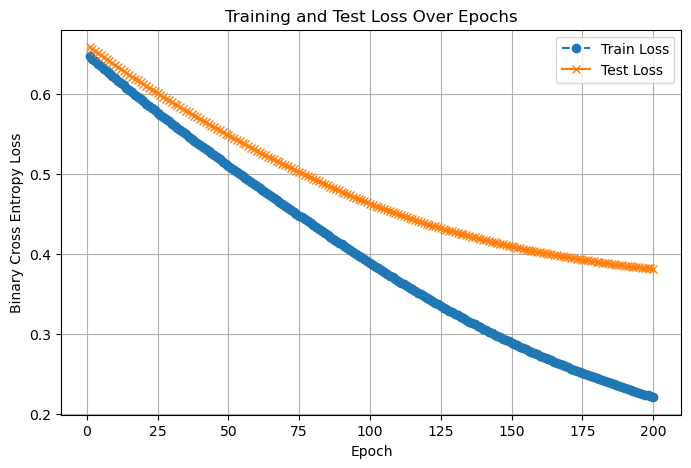

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', linestyle='--', marker='o')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss', linestyle='-', marker='x')
plt.title("Training and Test Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

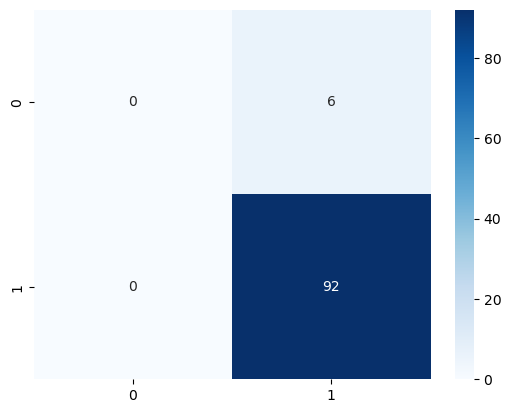

In [35]:
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train)
    y_train_pred = (y_train_pred > 0.5).float()

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Convert tensors to numpy arrays
y_true = y_train.cpu().numpy()
y_pred = y_train_pred.cpu().numpy()

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

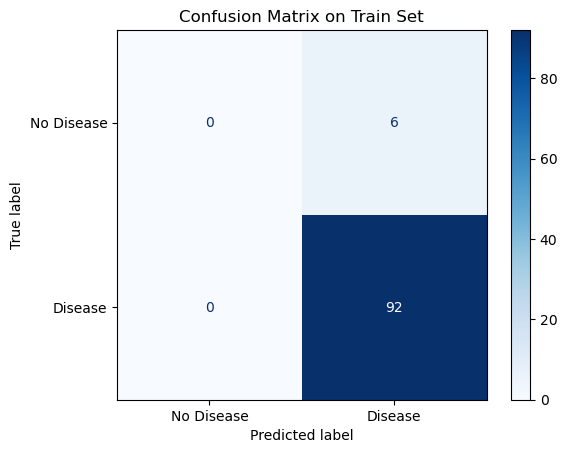

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert tensors to numpy arrays if needed
y_true = y_train.cpu().numpy()
y_pred = y_train_pred.cpu().numpy()

# Flatten arrays for sklearn compatibility
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix on Train Set")
plt.grid(False)
plt.show()

In [37]:
from sklearn.metrics import accuracy_score

model.eval()
with torch.no_grad():
    y_train_probs = model(X_train)  # Already sigmoid output
    y_train_preds = (y_train_probs >= 0.5).float()
    train_loss = loss_fn(y_train_probs, y_train)

train_acc = accuracy_score(y_train.numpy(), y_train_preds.numpy())

print(f"Train Loss: {train_loss.item():.4f}")
print(f"Train Accuracy: {train_acc * 100:.2f}%")

Train Loss: 0.2203
Train Accuracy: 93.88%


In [38]:
from sklearn.metrics import accuracy_score

model.eval()
with torch.no_grad():
    y_test_probs = model(X_test)  # Already sigmoid output
    y_test_preds = (y_test_probs >= 0.5).float()
    test_loss = loss_fn(y_test_probs, y_test)
    test_acc = accuracy_score(y_test.numpy(), y_test_preds.numpy())

print(f"Test Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Loss: 0.3819
Test Accuracy: 92.00%


<Axes: >

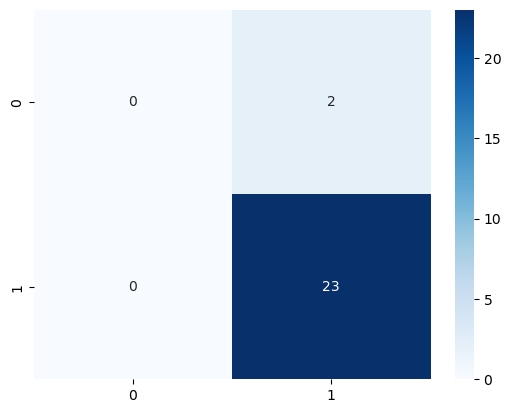

In [39]:
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    y_test_pred = (y_test_pred > 0.5).float()

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Convert tensors to numpy arrays
y_true = y_test.cpu().numpy()
y_pred = y_test_pred.cpu().numpy()

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

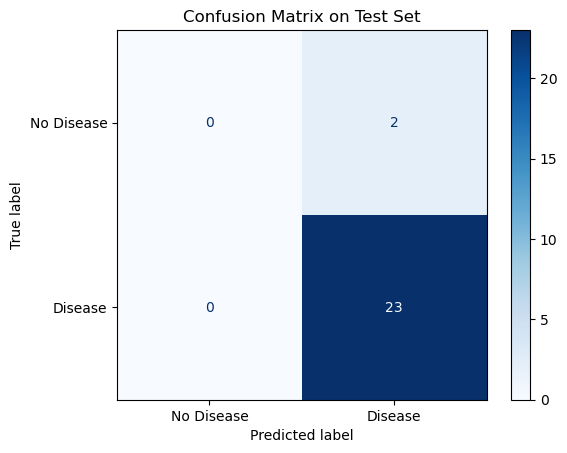

In [40]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix on Test Set")
plt.grid(False)
plt.show()

## Conclusion

In this project, a neural network was developed using PyTorch to predict heart disease based on clinical features. The workflow included data preprocessing, model definition, training, and evaluation using accuracy, loss curves, and confusion matrices.

**Key findings:**
- The model was trained and evaluated on both training and test sets.
- Loss and accuracy metrics were tracked and visualized, providing insight into the model's learning process.
- Confusion matrices revealed the model's prediction distribution and highlighted potential issues such as class imbalance or bias.

**Recommendations for improvement:**
- Address any class imbalance in the dataset using resampling techniques or by adjusting class weights.
- Experiment with different model architectures, hyperparameters, and regularization methods to improve generalization.
- Use cross-validation for more robust performance estimation.

**Summary:**  
This workflow provides a solid foundation for binary classification with neural networks in PyTorch. Further improvements can be made by addressing data and model limitations identified during evaluation.